In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры read_csv из pandas прочитать файл csv так,
# чтобы данные были разбиты по соответствующим колонкам 
# (а не все слилось в одну)
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [5]:
#отдельно посмотрим "деньги", "не деньги" и сроки по месяцам. уберем count, тк уже видели
non_money_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

summary_nmv = df[[col for col in df.columns if col in non_money_vars]].describe()
summary_nmv[summary_nmv.index != 'count']

,SEX,EDUCATION,MARRIAGE,AGE
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


In [6]:
#отдельно посмотрим "деньги", "не деньги" и сроки по месяцам. уберем count, тк уже видели
summary_mv = df[[col for col in df.columns if col not in non_money_vars
                 and ('PAY_AMT' in col or 'BILL_' in col)]].describe()
summary_mv[summary_mv.index != 'count']

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [7]:
#отдельно посмотрим "деньги", "не деньги" и сроки по месяцам. уберем count, тк уже видели
summary_mv = df[[col for col in df.columns if col not in non_money_vars 
                 and ('PAY_AMT' not in col and 'PAY_' in col)]].describe()
summary_mv[summary_mv.index != 'count']

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
#посчитаем моду для каждого столбца
df.mode(axis=0).iloc[0,:]

ID                                1.0
LIMIT_BAL                     50000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          2.0
AGE                              29.0
PAY_0                             0.0
PAY_2                             0.0
PAY_3                             0.0
PAY_4                             0.0
PAY_5                             0.0
PAY_6                             0.0
BILL_AMT1                         0.0
BILL_AMT2                         0.0
BILL_AMT3                         0.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                          0.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default.payment.next.month        0.0
Name: 0, dtype: float64

In [9]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
df[(df['EDUCATION'] == 2) & (df['SEX'] == 2)].shape[0]

8656

In [10]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

exemptions = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
df[[col for col in df.columns if col not in exemptions]].groupby('default.payment.next.month').median().T

default.payment.next.month,0,1
PAY_0,0.0,1.0
PAY_2,0.0,0.0
PAY_3,0.0,0.0
PAY_4,0.0,0.0
PAY_5,0.0,0.0
PAY_6,0.0,0.0
BILL_AMT1,23119.5,20185.0
BILL_AMT2,21660.5,20300.5
BILL_AMT3,20202.5,19834.5
BILL_AMT4,19000.0,19119.5


In [11]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

import numpy as np
table = pd.pivot_table(df, values='LIMIT_BAL', index=['EDUCATION', 'MARRIAGE'], columns=['SEX'], aggfunc=np.sum)
table

SEX                           1            2
EDUCATION MARRIAGE                          
0         1            410000.0     270000.0
          2           1290000.0    1070000.0
1         0            300000.0     480000.0
          1         443600000.0  498490000.0
          2         505760000.0  796870000.0
          3           4960000.0    3680000.0
2         0            360000.0     830000.0
          1         384180000.0  734216000.0
          2         330580000.0  599110000.0
          3           4470000.0    9540000.0
3         0           1160000.0    4050000.0
          1         146870000.0  234580000.0
          2          90157680.0  137710000.0
          3           2490000.0    5230000.0
4         1           4140000.0    8430000.0
          2           3990000.0    9990000.0
          3            150000.0     470000.0
5         1          10076000.0   18950000.0
          2           4950000.0   12790000.0
          3            100000.0     220000.0
6         1           2320000.0    2150000.0
          2           1610000.0    1110000.0
          3                 NaN     370000.0

In [12]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

import numpy as np

bin_tags = ['A', 'B', 'C', 'D', 'E', 'F']

bins = [10000,100000,200000,400000,700000,max(df['LIMIT_BAL'])]

df['limit_tag'] = df['LIMIT_BAL'].map(lambda flVal: bin_tags[np.digitize(flVal, bins, True).item(0)])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,limit_tag
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B


In [13]:
%matplotlib inline

In [14]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

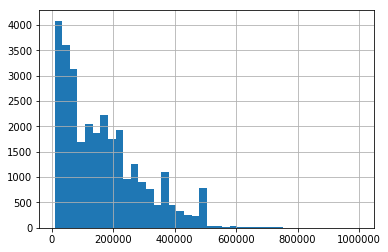

In [15]:
import seaborn as sns
df['LIMIT_BAL'].hist(bins = 40)

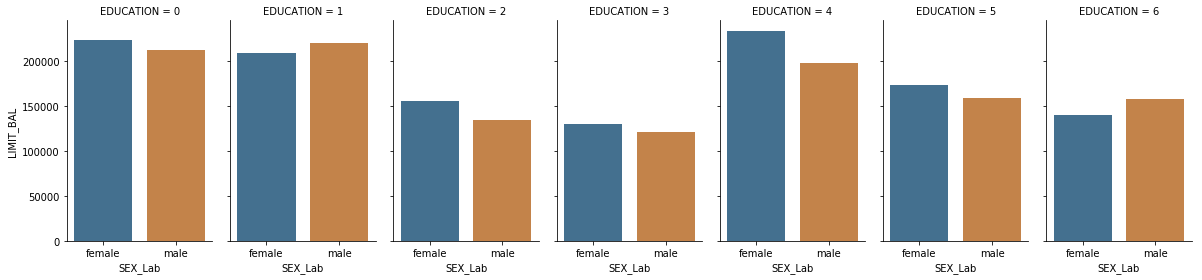

In [16]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
#TODO

#добавим "читаемые" значения полов
df['SEX_Lab'] = df['SEX'].map(lambda i: 'male' if i == 1 else 'female') 

g = sns.factorplot(x="SEX_Lab", y="LIMIT_BAL", col="EDUCATION",
                 data=df, saturation=.5,
              kind="bar", ci=None, aspect=.6, estimator = np.mean)

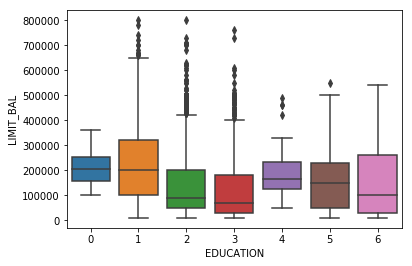

In [17]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
# g = sns.factorplot(x="SEX_Lab", y="LIMIT_BAL", col="EDUCATION",
#                  data=df[df['SEX'] == 1], saturation=.5,
#               kind="bar", ci=None, aspect=.6, estimator = np.mean)

g = sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=df[df['SEX'] == 1])


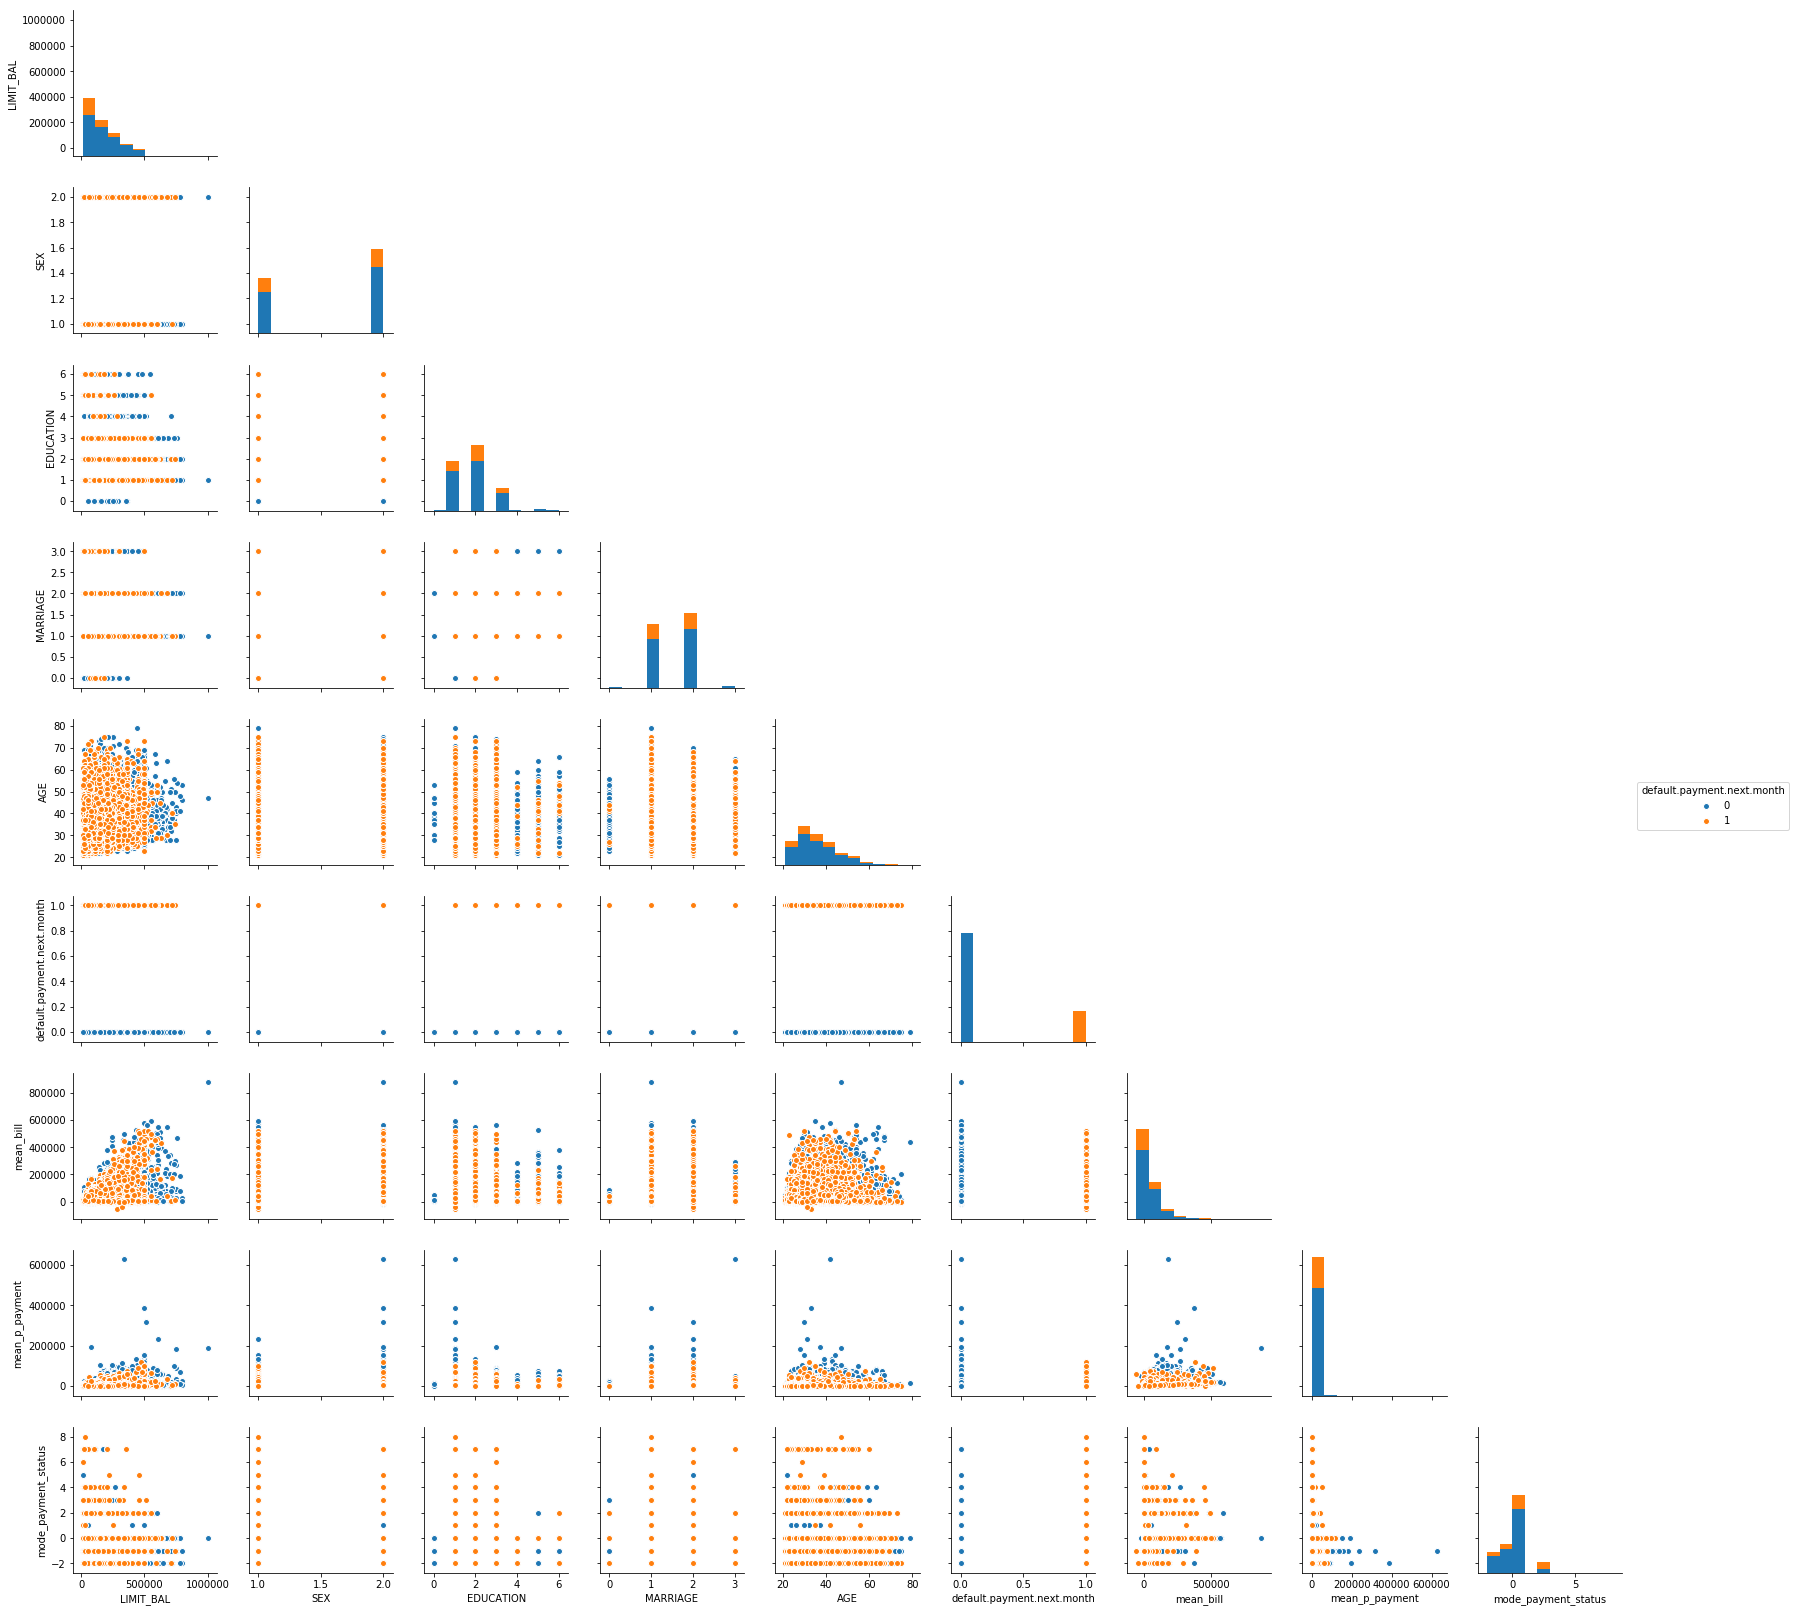

In [18]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)

#сгруппируем столбцы BILL PAY_AMT и AMT помесячно чтобы сократить к-во переменных.
#после этого посмотрим на зависимости 3 новых переменных с основными
#и отдельно на взаимозависимости внутри 3 групп BILL PAY_AMT и AMT

df['mean_bill'] = df[[col for col in df.columns if 'BILL' in col]].mean(axis=1)
df['mean_p_payment'] = df[[col for col in df.columns if 'PAY_AMT' in col]].mean(axis=1)
df['mode_payment_status'] = 1 #без этой строчки функция для расчета моды выдавала ошибку
df['mode_payment_status'] = df[[col for col in df.columns if 'AMT' not in col and 'PAY' in col]].mode(axis=1)

basics = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default.payment.next.month']
aggr = ['mean_bill', 'mean_p_payment', 'mode_payment_status']

main = basics + aggr

#Взаимозависимость основных переменных и агрегированных данных по платежа и статусам
g =sns.pairplot(df[[col for col in df.columns if col in main]],
                hue = 'default.payment.next.month',)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

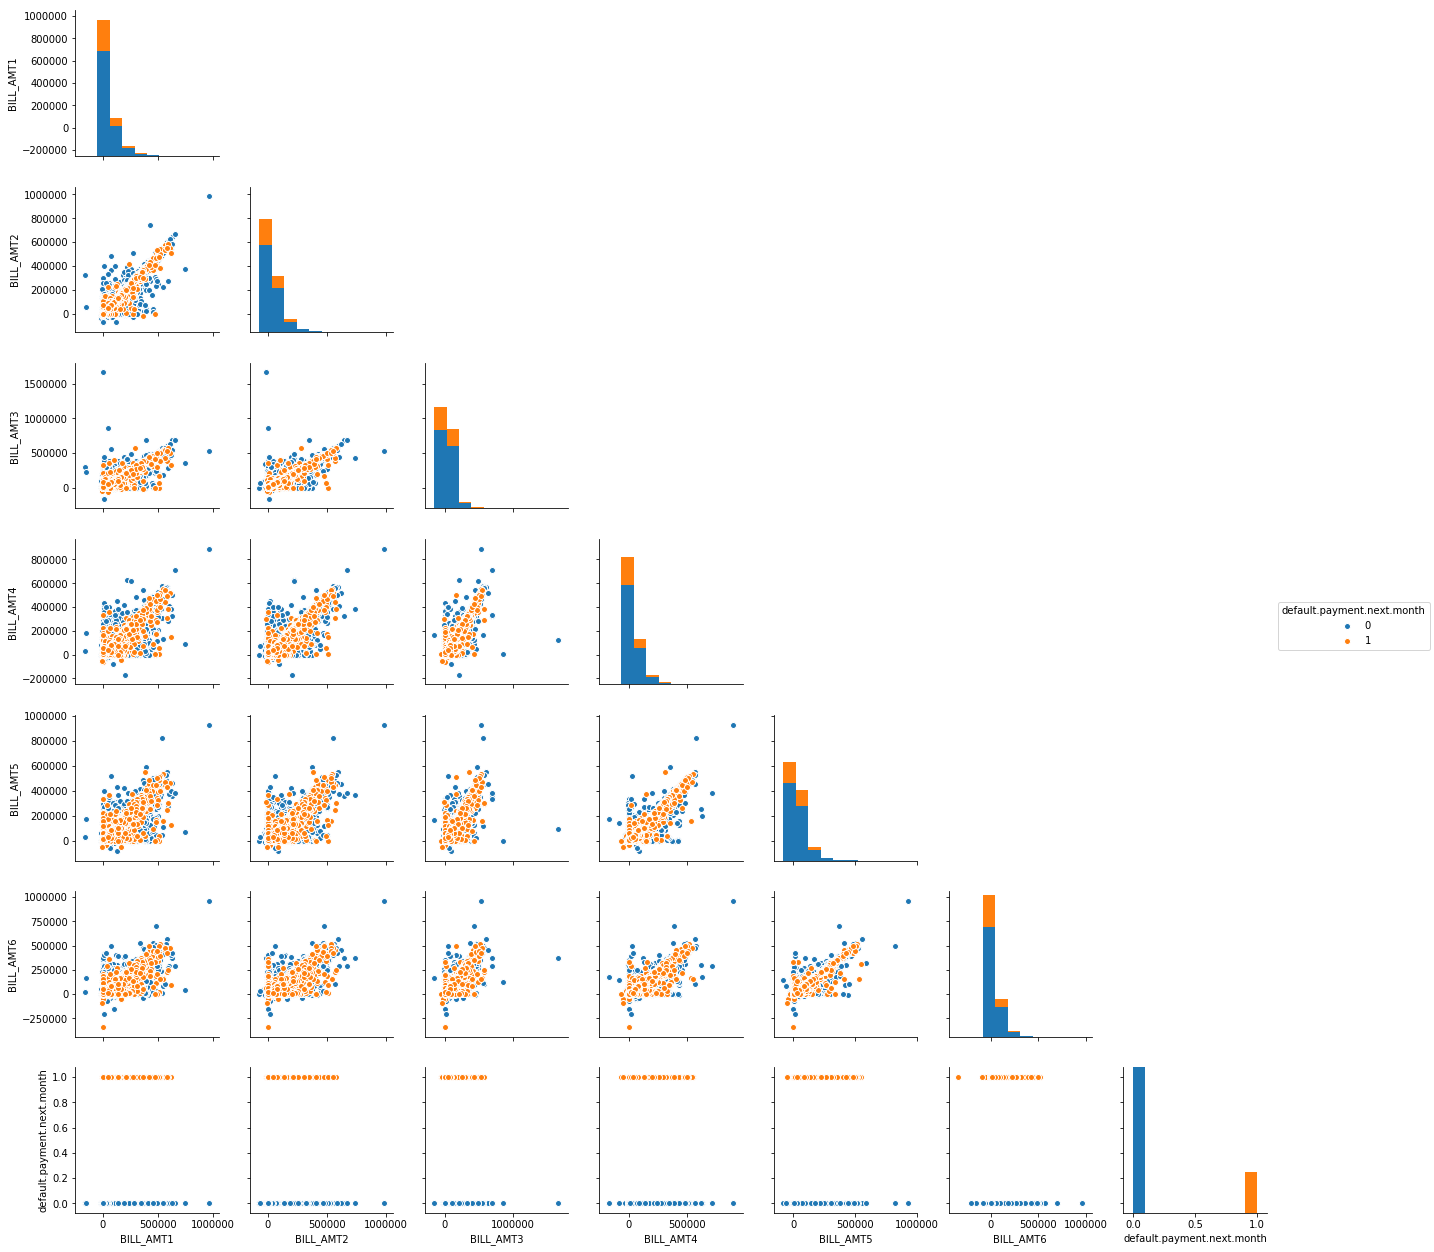

In [19]:
#Взаимозависимость внутри группы 'BILL'
g =sns.pairplot(df[[col for col in df.columns if 'BILL' in col or 'default.payment.next.month' in col]],
                hue = 'default.payment.next.month',)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

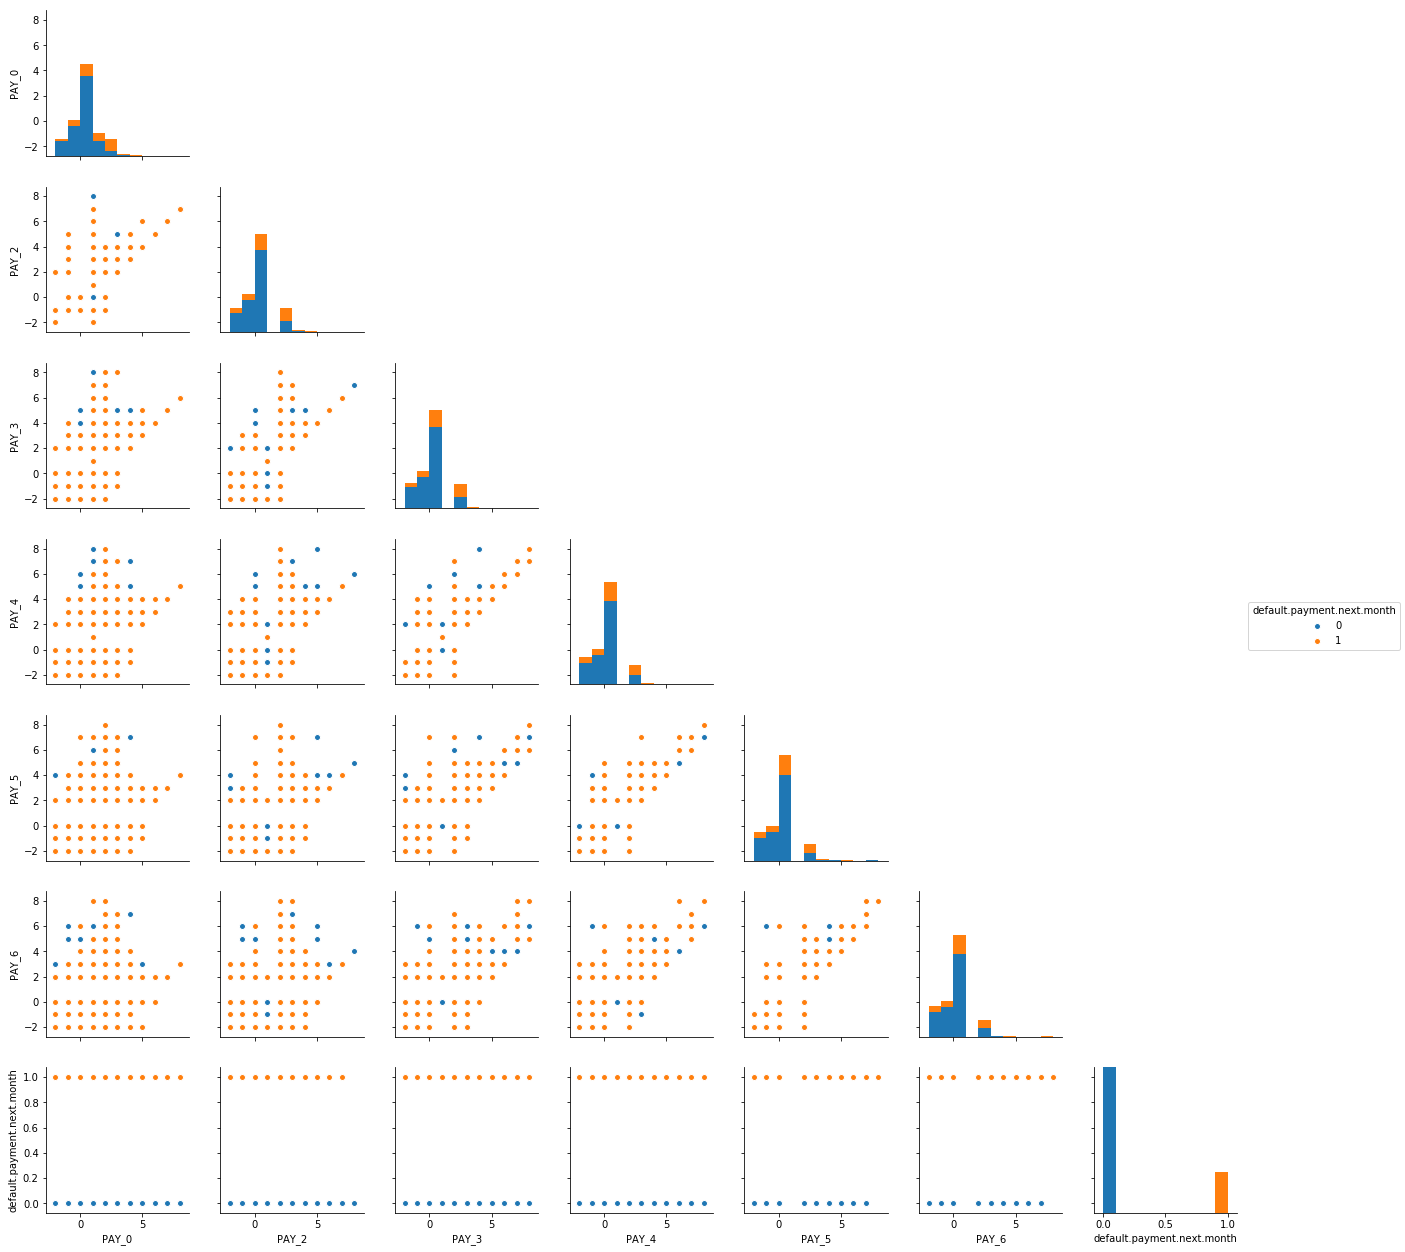

In [20]:
#Взаимозависимость внутри группы 'PAY_'
g =sns.pairplot(df[[col for col in df.columns if 'AMT' not in col and 'PAY' in col or 'default.payment.next.month' in col]],
                hue = 'default.payment.next.month',)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

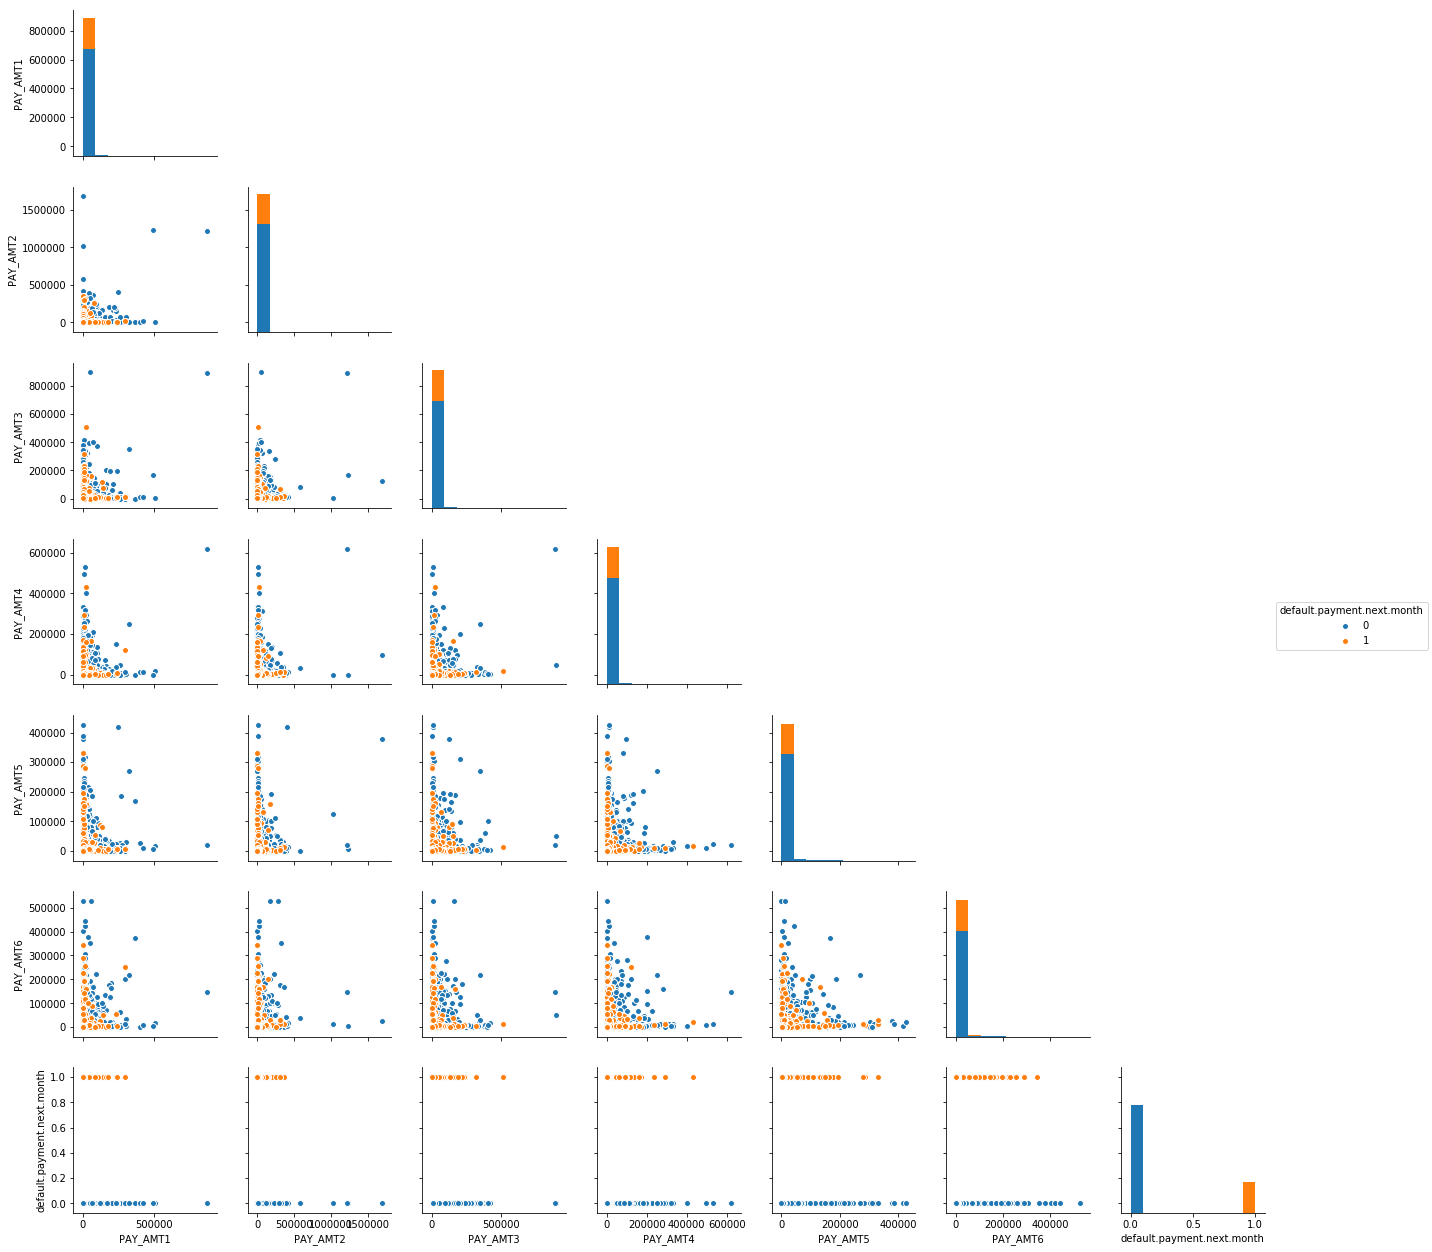

In [21]:
#Взаимозависимость внутри группы 'PAY_AMT'
g =sns.pairplot(df[[col for col in df.columns if 'PAY_AMT' in col or 'default.payment.next.month' in col]],
                hue = 'default.payment.next.month',)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)